In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data=pd.read_csv('heartdisease_data.csv')
data

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


#### Clearly we need proper column names

In [92]:
 col_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [93]:
data.columns=col_names
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [94]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [95]:
data['ca'][0]

'?'

#### There are null values but they are disguised as '?'. We need to mark them and handle those values.

In [96]:
for c in col_names:
    g=data[c]
    data[c]=[np.nan if i=='?' else i for i in g]

In [97]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
195,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
197,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [98]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
num           0
dtype: int64

In [99]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,199.000000,199.000000,199.000000,143,192,192,199.000000,146,146,143,97,2,34,199.000000
unique,NaN,NaN,NaN,40,99,2,NaN,59,2,14,3,1,3,NaN
top,NaN,NaN,NaN,120,0,0,NaN,120,1,0,2,0,7,NaN
freq,NaN,NaN,NaN,16,49,124,NaN,12,94,40,52,2,22,NaN
mean,59.331658,0.969849,3.502513,NaN,NaN,NaN,0.733668,NaN,NaN,NaN,NaN,NaN,NaN,1.517588
std,7.827080,0.171433,0.796928,NaN,NaN,NaN,0.684918,NaN,NaN,NaN,NaN,NaN,NaN,1.222038
min,35.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,55.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,60.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,64.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000


#### Few columns ('slope','ca','thal'), have so many null values that it is better to drop them.

In [100]:
data=data.drop(['slope','ca','thal'],axis=1)

In [101]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,199.000000,199.000000,199.000000,143,192,192,199.000000,146,146,143,199.000000
unique,NaN,NaN,NaN,40,99,2,NaN,59,2,14,NaN
top,NaN,NaN,NaN,120,0,0,NaN,120,1,0,NaN
freq,NaN,NaN,NaN,16,49,124,NaN,12,94,40,NaN
mean,59.331658,0.969849,3.502513,NaN,NaN,NaN,0.733668,NaN,NaN,NaN,1.517588
std,7.827080,0.171433,0.796928,NaN,NaN,NaN,0.684918,NaN,NaN,NaN,1.222038
min,35.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,55.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,60.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000
75%,64.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000


#### Interestingly the columns with missing values are categorical in nature so we fill those value with the corresponding modes of the concerned columns.

In [102]:
cols_with_missing=['trestbps','chol','fbs','thalach','exang','oldpeak']
for co in cols_with_missing:
    data[co].fillna(data[co].mode()[0],inplace=True)
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,199.000000,199.000000,199.000000,199,199,199,199.000000,199,199,199,199.000000
unique,NaN,NaN,NaN,40,99,2,NaN,59,2,14,NaN
top,NaN,NaN,NaN,120,0,0,NaN,120,1,0,NaN
freq,NaN,NaN,NaN,72,56,131,NaN,65,147,96,NaN
mean,59.331658,0.969849,3.502513,NaN,NaN,NaN,0.733668,NaN,NaN,NaN,1.517588
std,7.827080,0.171433,0.796928,NaN,NaN,NaN,0.684918,NaN,NaN,NaN,1.222038
min,35.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,55.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,60.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000
75%,64.000000,1.000000,4.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000


#### Now let's encode the categorical variables.

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
cols_categorical=cols_with_missing
for colu in cols_categorical:
    le=LabelEncoder()
    data[colu]=le.fit_transform(data[colu])

In [105]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,16.326633,34.050251,0.341709,0.733668,21.567839,0.738693,4.256281,1.517588
std,7.827080,0.171433,0.796928,9.080384,30.747875,0.475479,0.684918,14.734148,0.440455,3.848081,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,10.000000,0.000000,0.000000,0.000000,14.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,12.000000,32.000000,0.000000,1.000000,14.000000,1.000000,2.000000,1.000000
75%,64.000000,1.000000,4.000000,23.000000,59.000000,1.000000,1.000000,30.000000,1.000000,9.000000,3.000000
max,77.000000,1.000000,4.000000,39.000000,98.000000,1.000000,2.000000,58.000000,1.000000,13.000000,4.000000


#### As one can see all columns contain non-negative values, and their standard deviation is never too high compared to mean removing skewness is not that much crucial as the dataset contains only 199 instances. 

In [106]:
sns.set()

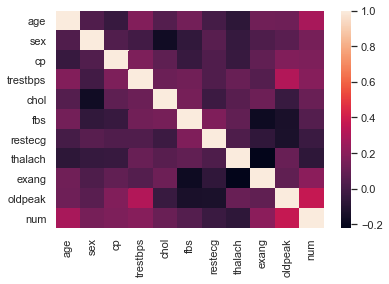

In [107]:
sns.heatmap(data.corr())
plt.show()

#### Age, oldpeak, sex have comparatively higher correlation with target variable

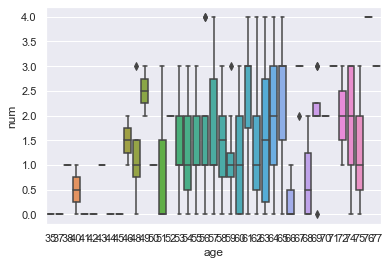

In [108]:
sns.boxplot(data['age'],data['num'])
plt.show()

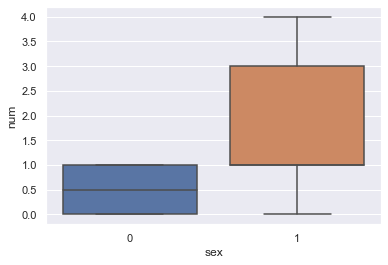

In [109]:
sns.boxplot(data['sex'],data['num'])
plt.show()

#### As it seems males are more prone to heart conditions. 

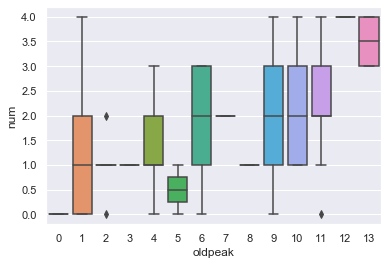

In [110]:
sns.boxplot(data['oldpeak'],data['num'])
plt.show()

#### the variable oldpeak has faint positive slope with heart condition.

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [115]:
y=data['num']
x=data.drop(['num'],axis=1)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [117]:
y=[0 if i==0 else 1 for i in y]

#### So we converted the target varible into 'no heart conditions' (as 0) and 'existing heart conditions(previously 1,2,3,4; now 1) as our interest of concern is wheather a person needs a visit to doctor or not.

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [121]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [129]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(tree.score(X_test,y_test))
print(confusion_matrix(tree.predict(X_test),y_test))
print(classification_report(tree.predict(X_test),y_test))

0.8
[[ 5  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.90      0.84      0.87        32

    accuracy                           0.80        40
   macro avg       0.70      0.73      0.71        40
weighted avg       0.82      0.80      0.81        40



In [130]:
random=RandomForestClassifier()
random.fit(X_train,y_train)
print(random.score(X_test,y_test))
print(confusion_matrix(random.predict(X_test),y_test))
print(classification_report(random.predict(X_test),y_test))

0.825
[[ 3  0]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.30      1.00      0.46         3
           1       1.00      0.81      0.90        37

    accuracy                           0.82        40
   macro avg       0.65      0.91      0.68        40
weighted avg       0.95      0.82      0.86        40



In [131]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_test,y_test))
print(confusion_matrix(nb.predict(X_test),y_test))
print(classification_report(nb.predict(X_test),y_test))

0.775
[[ 3  2]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.30      0.60      0.40         5
           1       0.93      0.80      0.86        35

    accuracy                           0.78        40
   macro avg       0.62      0.70      0.63        40
weighted avg       0.85      0.78      0.80        40



In [132]:
from sklearn.linear_model import LogisticRegression
logis=LogisticRegression()
logis.fit(X_train,y_train)
print(logis.score(X_test,y_test))
print(confusion_matrix(logis.predict(X_test),y_test))
print(classification_report(logis.predict(X_test),y_test))

0.8
[[ 2  0]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         2
           1       1.00      0.79      0.88        38

    accuracy                           0.80        40
   macro avg       0.60      0.89      0.61        40
weighted avg       0.96      0.80      0.85        40



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### The goal is to have a model with high recall for 1 states because if the model wrongly predicts someone to have heart desease all it can cost is a visit to doctor; but if someone with heart desease is cleared as healthy the consequences might be devastating.

#### As it seems decission tree is the best model for detecting people with heart conditions based on their history.

In [141]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, x, y, cv=5)
scores

array([0.725     , 0.75      , 0.75      , 0.775     , 0.76923077])

#### This is an agreeable avarage score. Let's save the model.

In [142]:
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [143]:
joblib.dump(tree,'heart.pkl')

['heart.pkl']